Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Банк обращается к нам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

In [24]:
import numpy as np
import pandas as pd
import plotly 
import plotly.express as px
import seaborn as sns
import matplotlib 
%matplotlib inline
plt.style.use('default')
import matplotlib.pyplot as plt
from datetime import date,timedelta

churn_data = pd.read_csv('data/churn.csv', sep=',')
churn_data = churn_data.drop('RowNumber', axis=1)
display(churn_data.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

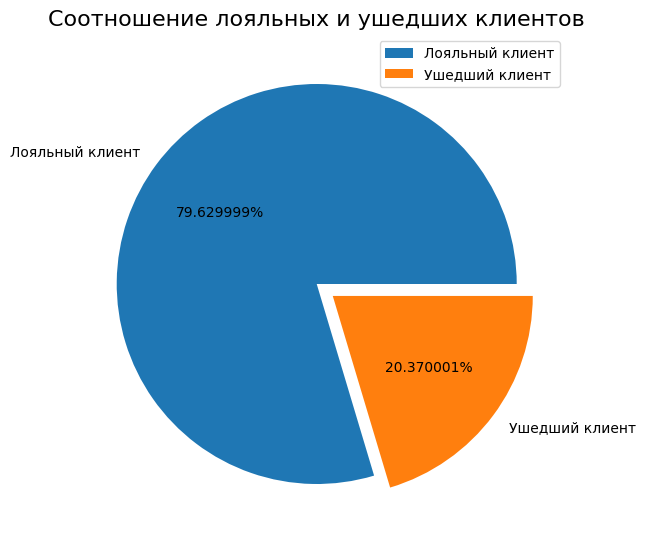

In [37]:
def loyal(x):
    if x == 0:
        return 'Лояльный клиент'
    else:
        return 'Ушедший клиент'
churn_data['Loyal'] = churn_data['Exited'].apply(loyal) #признак лояльности

#строим график
rate_customer = churn_data['Loyal'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    rate_customer,
    labels=rate_customer.index,
    autopct='%1f%%',
    explode=[0, 0.1]
);

axes.set_title('Соотношение лояльных и ушедших клиентов', fontsize=16)
axes.legend();

Вывод: большая часть клиентов (76,6%) остаются в банке. Но банк теряет примерно каждого пятого клиента(20,4%).

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

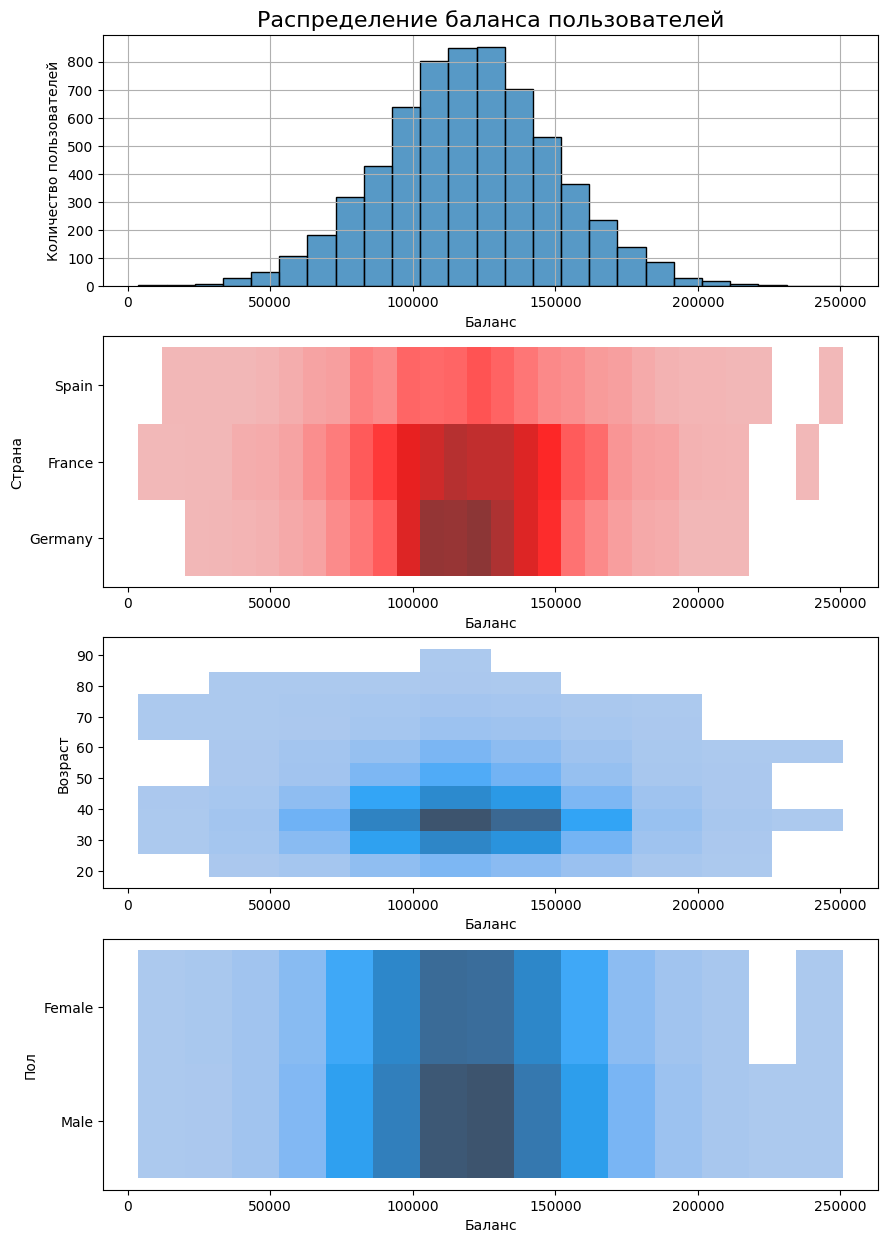

In [28]:

#выводим новую таблицу клиентов банка с балансом больше 2500$

mask1 = churn_data['Balance'] > 2500
client = churn_data[mask1]

#строим график

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))
sns.histplot(
    data=client,
    x='Balance',
    bins=25,
    ax=axes[0]
)

axes[0].set_title('Распределение баланса пользователей', fontsize=16)
axes[0].set_ylabel('Количество пользователей')
axes[0].set_xlabel('Баланс')
axes[0].grid()

sns.histplot(
    data=client,
    x='Balance',
    y='Geography',
    bins=30,
    color='red',
    ax=axes[1]
)
axes[1].set_ylabel('Страна')
axes[1].set_xlabel('Баланс')

sns.histplot(
    data=client,
    x='Balance',
    y='Age',
    bins=10,
    ax=axes[2]
)
axes[2].set_ylabel('Возраст')
axes[2].set_xlabel('Баланс')

sns.histplot(
    data=client,
    x='Balance',
    y='Gender',
    bins=15,
    ax=axes[3]
)
axes[3].set_ylabel('Пол')
axes[3].set_xlabel('Баланс');

Выводы: 
1.Вклады варируются от 50 000 до 200 000 долларов. Максимальное значение до 250 000 долларов (Испания).
2. Вклады от 80 000 до 150 000 долларов находятся в Германии.
3. Средний и основоной возраст клиентов от 25 до 60 лет, вне зависимости от пола. 

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

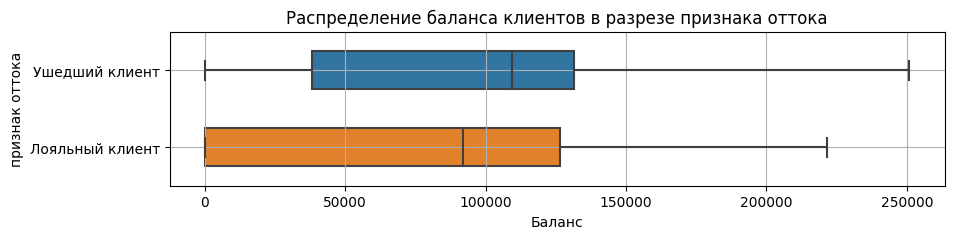

In [29]:
fig = plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=churn_data,
    y='Loyal',
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса клиентов в разрезе признака оттока')
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel('признак оттока')
boxplot.grid()

Выводы: сумма вкладов ушедших клиентов больше, чем у лояльных клиентов.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

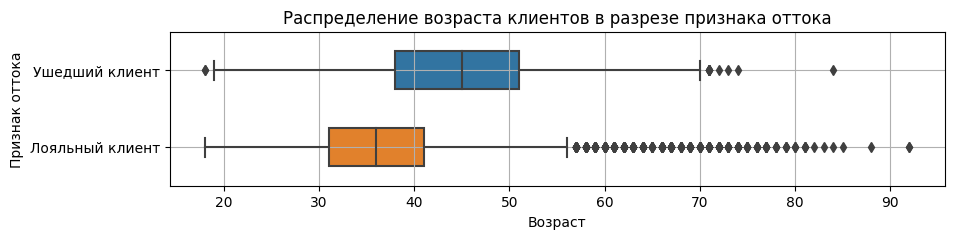

In [30]:
fig = plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=churn_data,
    y='Loyal',
    x='Age',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение возраста клиентов в разрезе признака оттока')
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Признак оттока')
boxplot.grid()

Выводы: Возраст лояльных клиентов основном 31 - 41 год, средний возраст 36 лет. Возраст ушедших клиентов от 38 лет до 51 года, средний возраст 46 лет. По этому графику видно, что банку стоит обратить внимание на данную возрастную категорию. 

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

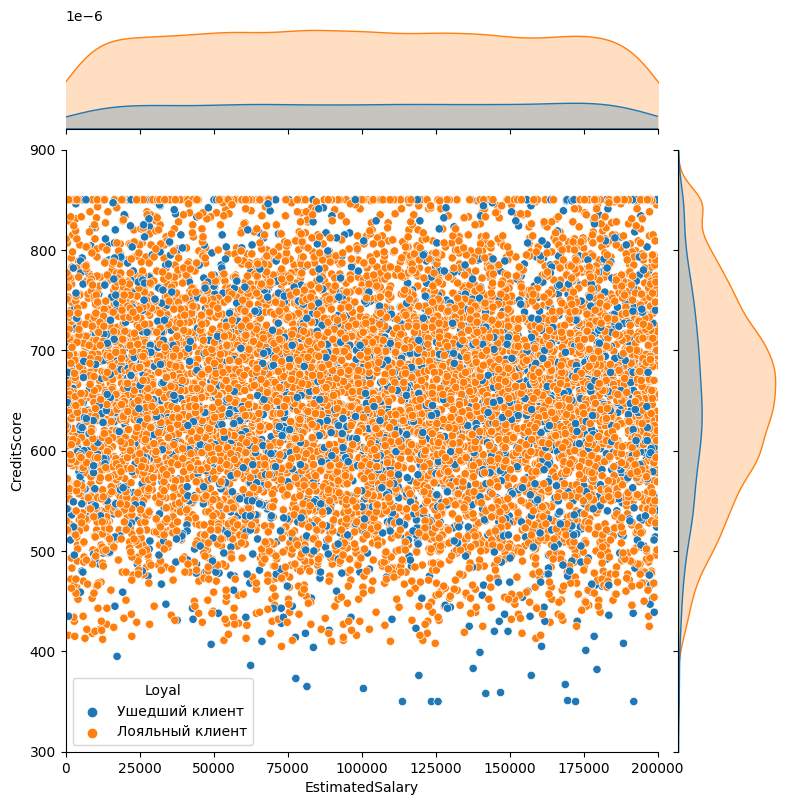

In [31]:
jointplot = sns.jointplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Loyal',
    xlim=(0, 200000),
    ylim=(300, 900),
    height=8
)

Выводы: нет взаимосвязи между кредитным рейтингом и зарплатой клиента. Не влияет на отток клиентов.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

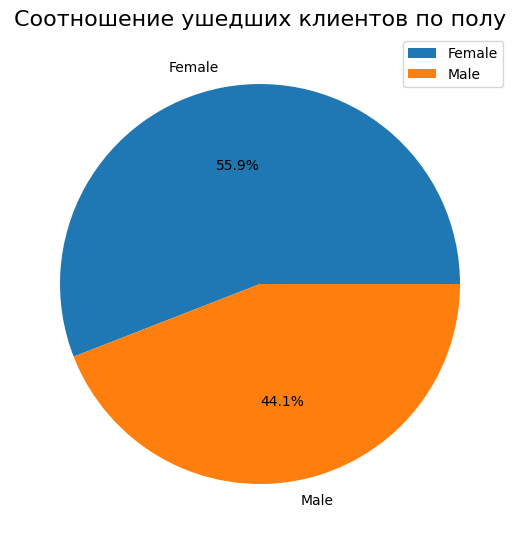

In [32]:
mask2 = churn_data['Exited'] == 1
exite = churn_data[mask2].groupby(['Gender'])['Exited'].count()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exite,
    labels=exite.index,
    autopct='%.1f%%',
    explode=[0, 0]
);

axes.set_title('Соотношение ушедших клиентов по полу', fontsize=16)
axes.legend();

Выводы: немного больше ушедших клиентов женщин. 

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

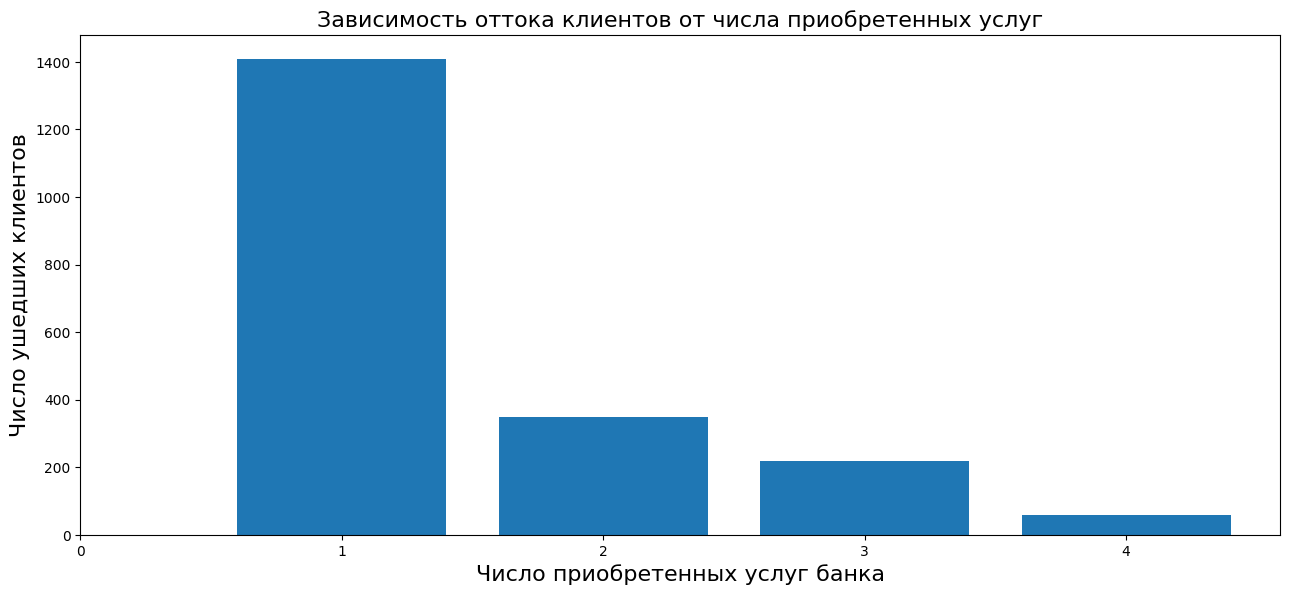

In [38]:
grouped = churn_data.groupby(by='NumOfProducts')['Exited'].sum()

fig = plt.figure(figsize=(12, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=grouped.index, height=grouped);
axes.set_ylabel('Число ушедших клиентов', fontsize=16)
axes.set_xlabel('Число приобретенных услуг банка', fontsize=16)
axes.set_xticks(range(0,5,1))
axes.set_title('Зависимость оттока клиентов от числа приобретенных услуг', fontsize=16)
plt.show()

Чем больше приобретенных услуг, тем меньше отток клиентов. 

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

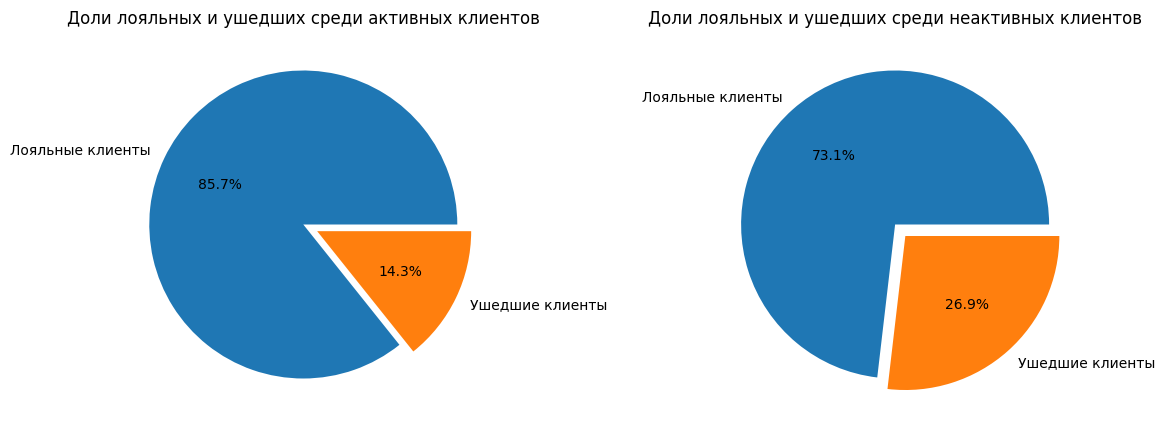

In [39]:
active = churn_data['Exited'][churn_data['IsActiveMember'] == 1] #активные
inactive = churn_data['Exited'][churn_data['IsActiveMember'] == 0] #неактивные 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

_, _, _, = axes[0].pie(
    active.value_counts(), 
    autopct='%.1f%%',
    explode = [0, 0.1],
    labels=['Лояльные клиенты','Ушедшие клиенты']
)
axes[0].set_title("Доли лояльных и ушедших среди активных клиентов")

_, _, _ = axes[1].pie(
    inactive.value_counts(), 
    autopct='%.1f%%',
    explode = [0, 0.1],
    labels=['Лояльные клиенты','Ушедшие клиенты']
)
axes[1].set_title("Доли лояльных и ушедших среди неактивных клиентов")

plt.show()

Выводы: Доля неактивных клиентов в 2 раза выше. Банку нужно больше работать с неактивными клиентами,например, предлагая особые условия. 

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [40]:
grouped = churn_data.groupby(by='Geography')['Exited'].agg(['count', 'sum'])
grouped['Ratio'] = grouped['sum']/grouped['count']*100 
display(grouped)

fig = px.choropleth(
    data_frame=grouped, 
    locations=grouped.index, 
    locationmode = "country names",
    color="Ratio",
    range_color=[16, 33], 
    title='Доля ушедших клиентов банка по странам', 
    width=900,
    height=600,
    color_continuous_scale='Reds'
)

fig.show()

,count,sum,Ratio
Geography,,,
France,5014,810,16.154767
Germany,2509,814,32.443204
Spain,2477,413,16.673395


Выводы: Больше всего отток клиентов наблюдается в Германии. Отток клиентов может быть по различными причинам:
разный уровень жизни клиентов, законы конкретной страны, коонкуренция в банковской сфере, уровень доходов и расходов и т.д.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [41]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

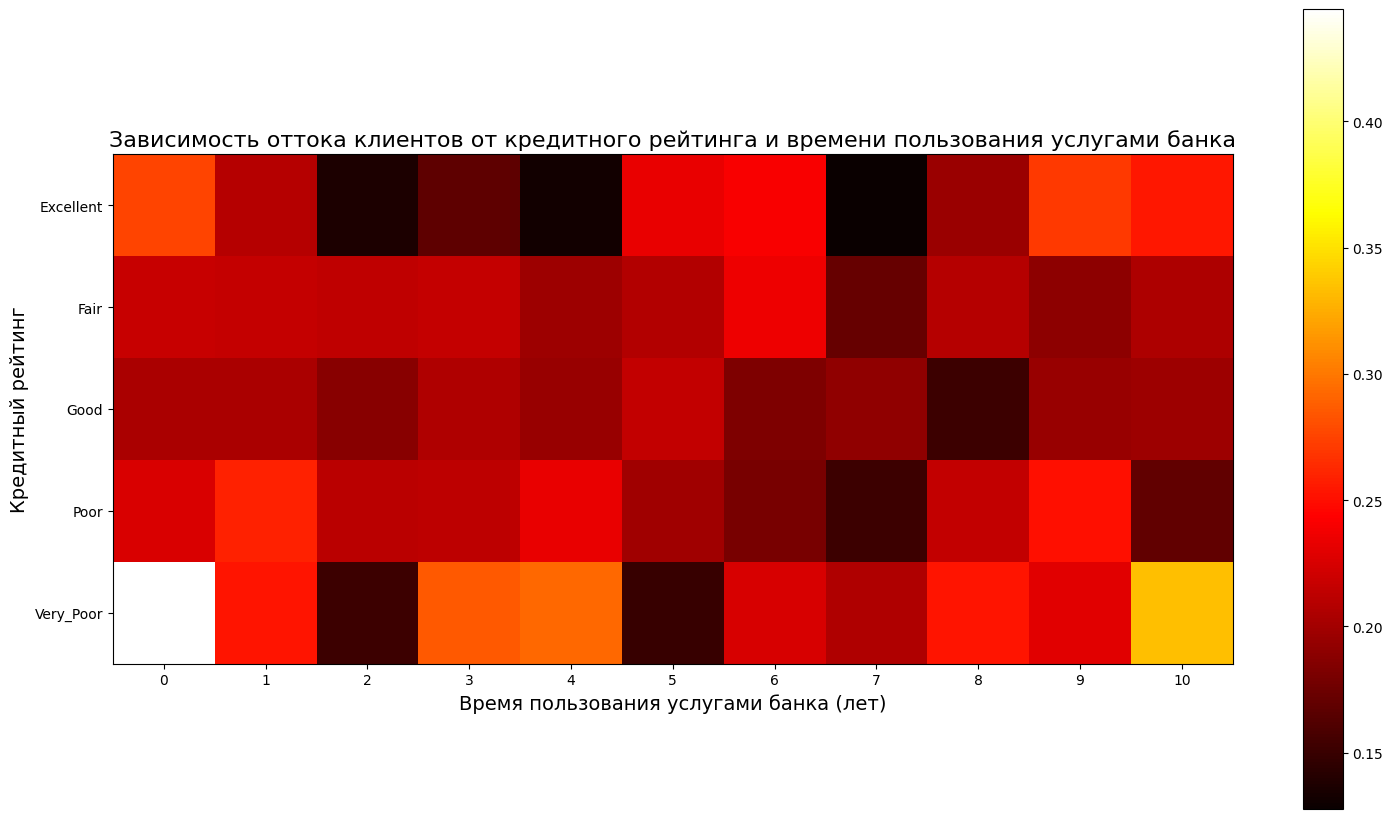

In [42]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited', # по умолчанию будет выводиться среднее значение (mean)
    index = 'CreditScoreCat',
    columns= 'Tenure'
)

fig = plt.figure(figsize=(14,8))
axes = fig.add_axes([0,0,1,1])
axes.set_title('Зависимость оттока клиентов от кредитного рейтинга и времени пользования услугами банка', fontsize=16)
axes.set_ylabel('Кредитный рейтинг', fontsize=14)
axes.set_xlabel('Время пользования услугами банка (лет)', fontsize=14)
axes.set_xticks(pivot.columns)
axes.set_yticks(range(5))
axes.set_yticklabels(labels=pivot.index)
plt.imshow(pivot, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

Выводы: Уходят кленты с низким кредитным рейтингом, которые пользуются услугами банка 0 или 10 лет. 